In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def mmq (y, yerr, I_inicial):
    x = np.array([0.5, 1, 1.5, 2, 2.5])         # x

    # Modelo linear
    def linear(x, a, b):
        return a*x + b

    # Ajuste ponderado pelas incertezas
    popt, pcov = curve_fit(linear, x, y, sigma=yerr, absolute_sigma=True)
    a, b = popt
    da, db = np.sqrt(np.diag(pcov))

    print(f"Coeficiente Angular = {a:.2e} ± {da:.2e}")
    print(f"Interseção = {b:.2e} ± {db:.2e}")

    y_fit = linear(x, a, b)
    ss_res = np.sum((y - y_fit)**2)              # soma dos quadrados dos resíduos
    ss_tot = np.sum((y - np.mean(y))**2)         # soma total
    r2 = 1 - ss_res/ss_tot
    print(f"R² = {r2:.4f}")

    # Plot
    plt.errorbar(x, y, yerr=yerr, fmt='o', label='Dados')
    xx = np.linspace(min(x), max(x), 100)
    plt.plot(xx, linear(xx, *popt), 'r-', label=f"Ajuste: y = {a:.2e}x + {b:.2e}")
    plt.xlabel("x [cm]")
    plt.ylabel("ln(Io/I)")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

    mi = a
    print(f'µ = {mi} ')
    mi_mass = mi/2.698900
    print(f'µ_mássico = {mi_mass} [cm²/g]')
    exponencial(x, y, yerr, mi, I_inicial)

def exponencial(x, y, yerr, mi, I_inicial):
    y = I_inicial/(np.exp(y))
    yerr=yerr*y
    #zoom
    xx = np.linspace(min(x),max(x), 500)
    plt.errorbar(x, y, yerr=yerr, fmt='go', label='Dados')
    plt.plot(xx, I_inicial*np.exp(-mi*xx), 'purple', label=f"Ajuste: y = {I_inicial}e^(-{mi}x)")
    plt.xlabel("x [cm]")
    plt.ylabel("Intensidade")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()
    #sem zoom
    xx = np.linspace(min(x)-3,max(x)+3, 500)
    plt.errorbar(x, y, yerr=yerr, fmt='go', label='Dados')
    plt.plot(xx, I_inicial*np.exp(-mi*xx), 'purple', label=f"Ajuste: y = {I_inicial}e^(-{mi}x)")
    plt.xlabel("x [cm]")
    plt.ylabel("Intensidade")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()



Coeficiente Angular = 2.10e-01 ± 1.02e-02
Interseção = -2.20e-02 ± 1.64e-02
R² = 1.0000


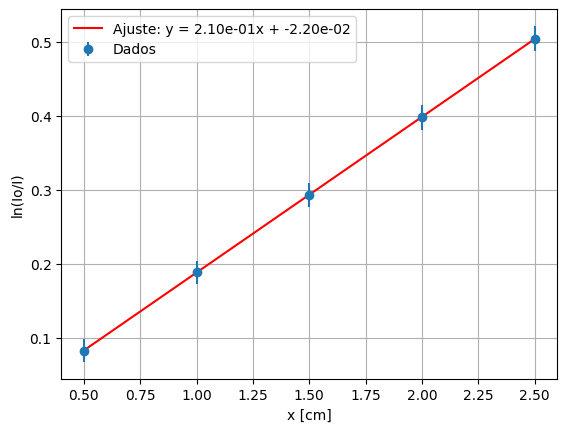

µ = 0.2103382894220258 
µ_mássico = 0.07793482137983096 [cm²/g]


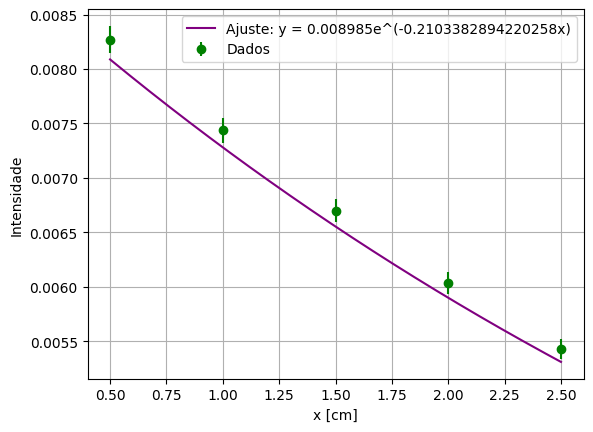

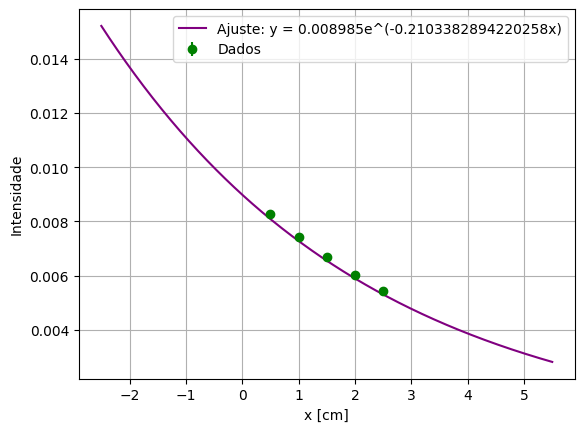

In [ ]:
#Alumínio - Isotrópico
I_inicial = 0.008985
y = np.array([0.0829220112, 0.1889545247, 0.2935982587, 0.3978149793, 0.504354306])                    # ln(Io/I)
yerr = np.array([0.01520690633, 0.01564640534, 0.01609627286, 0.01655566368, 0.01710263138])              # incertezas ln(Io/I)
mmq(y, yerr, I_inicial)


Coeficiente Angular = 2.00e-01 ± 1.21e-03
Interseção = -1.38e-03 ± 1.92e-03
R² = 1.0000


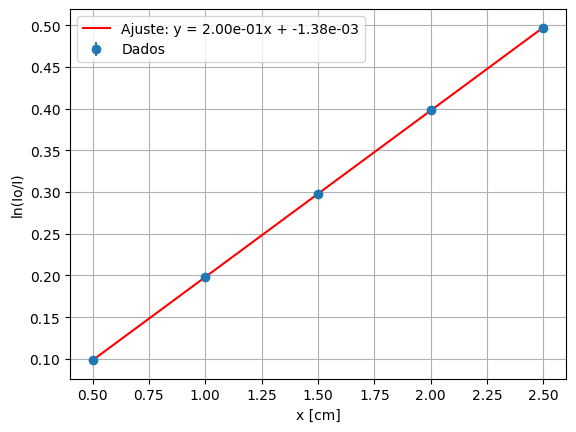

µ = 0.19954288982120968 
µ_mássico = 0.07393489563200181 [cm²/g]


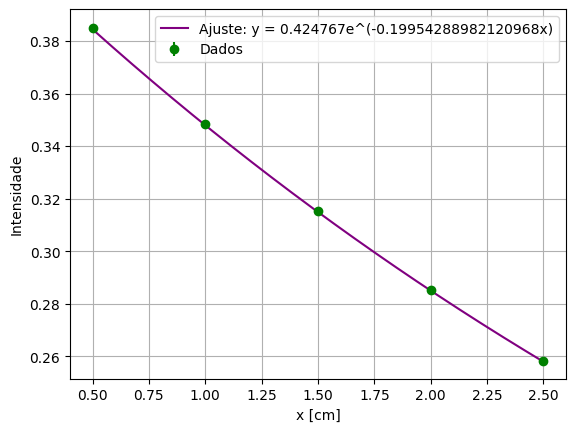

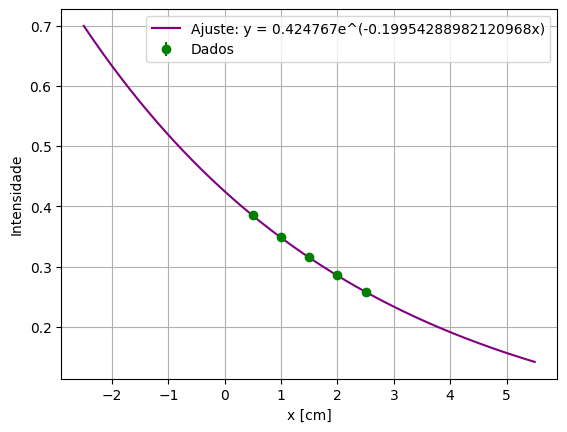

In [ ]:
#Alumínio - Colimado
I_inicial = 0.424767
y = np.array([0.09817278145, 0.1982555566, 0.2981018531, 0.3981222105, 0.4970087918])                    # ln(Io/I)
yerr = np.array([0.001769180601, 0.001843908891, 0.001920937271, 0.002, 0.002080865205])              # incertezas ln(Io/I)
mmq(y, yerr, I_inicial)



0,07793482137983096
0,07393489563200181